<a href="https://colab.research.google.com/github/TheLusca/tapajos_river_streamflow/blob/master/lstm_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long short-term memory Time Series Forecasting
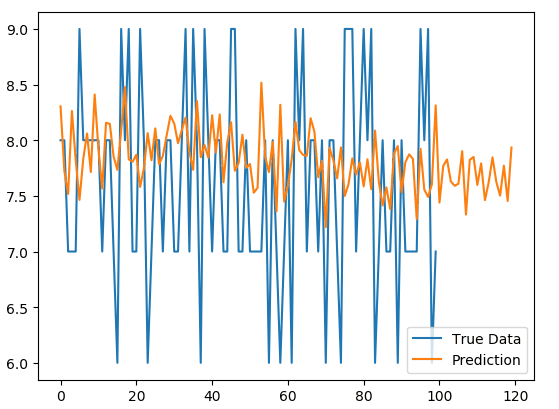


## Este notebook contém os parâmetros da rede neural Long short-term memory (LSTM) com o propósito de realizar predicões de cota do rio tapajos com base nos dados históricos da Rede Hidrometeorológica Nacional (RHN) pertencente a Agência Nacional de Águas (ANA)

✏ author: Lucas de Andrade https://github.com/TheLusca

Referencias:
*   https://www.snirh.gov.br/hidroweb/serieshistoricas
*   https://metadados.snirh.gov.br/geonetwork/srv/api/records/f85dbf06-a869-414c-afc5-bb01869e9156


Código das estações:

*   17430000 - BARRA DO SÃO MANUEL
*   17730000 - ITAITUBA
*   17900000 - SANTAREM


#Manter conexão com collab

Pare de sair do Google Colab
Aqui está a solução (fonte): antes de rodar o seu notebook, basta abrir o Chrome DevTools pressionando F12 (ou Ctrl + Shift + I no Linux) e executar o seguinte código JavaScript em seu console:

```
function KeepClicking(){
   console.log("Clicking");
   document.querySelector("colab-toolbar-button#connect").click()
}setInterval(KeepClicking,60000)
```

Aqui, o valor 60.000 representa os milissegundos (equivalente a um minuto). Esse pequeno código clica na tela do Colab a cada 60 segundos. Assim, o Colab pensa que o notebook não está silencioso e você não precisa se preocupar em ser desconectado

[Como Treinar um modelo no google collab](https://medium.com/@pierre_guillou/como-treinar-um-modelo-de-deep-learning-no-colab-e3cc4da64d9a)

# Conectar ao google drive



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


# Acessar e visualizar o diretório

In [ ]:
%cd /content/gdrive/MyDrive/tapajos_data/data

%pwd
print('\nEstrutura de Arquivos:')
%ls

/content/gdrive/MyDrive/tapajos_data/data

Estrutura de Arquivos:
1_raw/  2_filtered/  3_staged/  4_results/


# Visualizando o dataset


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('3_staged/itaituba.csv')

df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values(by='Data') # Ordenar por data
#df.head()
df.tail()

,Data,Cota01,Cota02,Cota03,Cota04,Cota05,Cota06,Cota07,Cota08,Cota09,...,Cota22,Cota23,Cota24,Cota25,Cota26,Cota27,Cota28,Cota29,Cota30,Cota31
6,2023-06-01,0.630841,0.625874,0.620327,0.616374,0.615385,0.615385,0.617991,0.622509,0.619271,...,0.587031,0.583428,0.571757,0.558140,0.541958,0.533721,0.533256,0.532089,0.532710,NaN
5,2023-07-01,0.538551,0.539627,0.536215,0.539181,0.540793,0.545455,0.543224,0.542790,0.542891,...,0.502844,0.503973,0.482204,0.474419,0.465035,0.454651,0.449242,0.439907,0.435748,0.425882
4,2023-08-01,0.428738,0.427739,0.426402,0.430409,0.430070,0.431235,0.428738,0.426729,0.426557,...,0.364050,0.357548,0.346728,0.336047,0.325175,0.316279,0.304551,0.298716,0.295561,0.283529
3,2023-09-01,0.283879,0.282051,0.276869,0.278363,0.278555,0.275058,0.267523,0.261430,0.250294,...,0.341297,0.335982,0.329506,0.312791,0.299534,0.288372,0.282380,0.271879,0.258178,NaN
0,2023-12-01,0.026869,0.030303,0.025701,0.028070,0.034965,0.034965,0.032710,0.032825,0.029377,...,0.081911,0.090806,0.086108,0.083721,0.080420,0.091860,0.099183,0.106184,0.116822,0.120000


# Tratando valores NaNs

## Substituir os NaNs pela media da linha anterior com a próxima

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Seleciona colunas numéricas
df[numeric_cols] = df[numeric_cols].fillna((df[numeric_cols].shift() + df[numeric_cols].shift(-1)) / 2)

# Visualizar NaNs

In [ ]:
print("Contagem de valores NaN por coluna:")
print(df.isna().sum())

Contagem de valores NaN por coluna:
Data      0
Cota01    0
Cota02    0
Cota03    0
Cota04    0
Cota05    0
Cota06    0
Cota07    0
Cota08    0
Cota09    0
Cota10    0
Cota11    0
Cota12    2
Cota13    0
Cota14    0
Cota15    0
Cota16    0
Cota17    0
Cota18    0
Cota19    0
Cota20    0
Cota21    0
Cota22    0
Cota23    0
Cota24    0
Cota25    0
Cota26    0
Cota27    0
Cota28    0
Cota29    0
Cota30    0
Cota31    7
dtype: int64


In [ ]:
# Exibir a contagem de valores NaN por coluna
print("Contagem de valores NaN por coluna:")
print(df.isna().sum())

# Remover todas as linhas com valores NaN
df = df.dropna()

# Opcional: Exibir a contagem de valores NaN após a remoção
print("\nContagem de valores NaN após remoção:")
print(df.isna().sum())


Contagem de valores NaN por coluna:
Data      0
Cota01    0
Cota02    0
Cota03    0
Cota04    0
Cota05    0
Cota06    0
Cota07    0
Cota08    0
Cota09    0
Cota10    0
Cota11    0
Cota12    2
Cota13    0
Cota14    0
Cota15    0
Cota16    0
Cota17    0
Cota18    0
Cota19    0
Cota20    0
Cota21    0
Cota22    0
Cota23    0
Cota24    0
Cota25    0
Cota26    0
Cota27    0
Cota28    0
Cota29    0
Cota30    0
Cota31    7
dtype: int64

Contagem de valores NaN após remoção:
Data      0
Cota01    0
Cota02    0
Cota03    0
Cota04    0
Cota05    0
Cota06    0
Cota07    0
Cota08    0
Cota09    0
Cota10    0
Cota11    0
Cota12    0
Cota13    0
Cota14    0
Cota15    0
Cota16    0
Cota17    0
Cota18    0
Cota19    0
Cota20    0
Cota21    0
Cota22    0
Cota23    0
Cota24    0
Cota25    0
Cota26    0
Cota27    0
Cota28    0
Cota29    0
Cota30    0
Cota31    0
dtype: int64


# Dividir dataset

In [ ]:
# Definir a proporção de divisão
train_size = int(len(df) * 0.7)  # 70% para treinamento
val_size = int(len(df) * 0.15)    # 15% para validação
test_size = len(df) - train_size - val_size  # O restante para teste

# Dividir os dados
train_data = df[:train_size]
val_data = df[train_size:train_size + val_size]
test_data = df[train_size + val_size:]

# Exibir as divisões
print("Conjunto de Treinamento:")
print(train_data.head())

print("\nConjunto de Validação:")
print(val_data.head())

print("\nConjunto de Teste:")
print(test_data.head())


Conjunto de Treinamento:
          Data    Cota01    Cota02    Cota03    Cota04    Cota05    Cota06  \
269 1999-01-01  0.299065  0.310023  0.316589  0.327485  0.337995  0.348485   
268 1999-02-01  0.497664  0.496503  0.495327  0.491228  0.486014  0.483683   
267 1999-03-01  0.530374  0.548951  0.566589  0.584795  0.594406  0.607226   
266 1999-04-01  0.734813  0.729604  0.719626  0.715789  0.706294  0.707459   
265 1999-05-01  0.660047  0.665501  0.665888  0.671345  0.673660  0.674825   

       Cota07    Cota08    Cota09  ...    Cota22    Cota23    Cota24  \
269  0.350467  0.354045  0.357227  ...  0.508532  0.510783  0.505166   
268  0.488318  0.491208  0.488837  ...  0.503982  0.508513  0.507463   
267  0.616822  0.631887  0.639248  ...  0.739477  0.745743  0.752009   
266  0.706776  0.706917  0.703878  ...  0.657565  0.657208  0.654420   
265  0.675234  0.676436  0.678026  ...  0.705347  0.711691  0.712974   

       Cota25    Cota26    Cota27    Cota28    Cota29    Cota30    Cota31

# Aplicando o Long Short Term Memory (LSTM)

# Preparação das Sequências para o LSTM

In [ ]:
def create_sequences(data, lookback=1):
    X, y = [], []

    # Iterar sobre o DataFrame para criar sequências
    for i in range(len(data) - lookback):
        # Seleciona a sequência de entrada e a saída correspondente
        X.append(data.iloc[i:i + lookback, 1:].values)  # Todas as colunas exceto 'Data'
        y.append(data.iloc[i + lookback, 1:].values)    # Todas as colunas exceto 'Data' da próxima linha

    return np.array(X), np.array(y)

# Criar as sequências para os conjuntos de treinamento, validação e teste
X_train, y_train = create_sequences(train_data, lookback=1)
X_val, y_val = create_sequences(val_data, lookback=1)
X_test, y_test = create_sequences(test_data, lookback=1)

# Exibir as formas das entradas e saídas
print("Formato das entradas de Treinamento (X_train):", X_train.shape)
print("Formato das saídas de Treinamento (y_train):", y_train.shape)
print("Formato das entradas de Validação (X_val):", X_val.shape)
print("Formato das saídas de Validação (y_val):", y_val.shape)
print("Formato das entradas de Teste (X_test):", X_test.shape)
print("Formato das saídas de Teste (y_test):", y_test.shape)


Formato das entradas de Treinamento (X_train): (181, 1, 31)
Formato das saídas de Treinamento (y_train): (181, 31)
Formato das entradas de Validação (X_val): (38, 1, 31)
Formato das saídas de Validação (y_val): (38, 31)
Formato das entradas de Teste (X_test): (39, 1, 31)
Formato das saídas de Teste (y_test): (39, 31)


# Construção do Modelo LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Definir o modelo LSTM
model = models.Sequential()

# Primeira camada LSTM
model.add(layers.LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))

# Segunda camada LSTM
model.add(layers.LSTM(32, activation='tanh'))

# Camada de saída densa
model.add(layers.Dense(y_train.shape[1]))  # Saída com o mesmo número de cotas

# Compilar o modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Resumo do modelo
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 64)               │          24,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 31)                  │           1,023 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,015 (148.50 KB)

 Trainable params: 38,015 (148.50 KB)

 Non-trainable params: 0 (0.00 B)

# Treinar modelo

In [ ]:
# Verificar os tipos de dados
print("Tipo de dados em X_train:", X_train.dtype)
print("Tipo de dados em y_train:", y_train.dtype)

# Converter para float32 se necessário
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

# Verificar novamente os tipos de dados após a conversão
print("Após conversão - Tipo de dados em X_train:", X_train.dtype)
print("Após conversão - Tipo de dados em y_train:", y_train.dtype)

# Tentar treinar o modelo novamente
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=16,
                    verbose=1)
# Salvar o modelo treinado, se necessário
model.save('4_results/modelo_predicao_lstm.keras')
print('modelo salvo')



Tipo de dados em X_train: float64
Tipo de dados em y_train: object
Após conversão - Tipo de dados em X_train: float32
Após conversão - Tipo de dados em y_train: float32
Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2622 - val_loss: 0.2421
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2255 - val_loss: 0.1653
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1581 - val_loss: 0.0728
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0682 - val_loss: 0.0390
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 - val_loss: 0.0254
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0226 - val_loss: 0.0227
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0256 - val_loss: 0.0215
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - val_loss: 0.0212
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0229 - val_loss: 0.0203
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0221 - val_lo

# Avaliação do modelo

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a perda no conjunto de teste
test_loss = model.evaluate(X_test, y_test)
print(f"Perda no conjunto de teste: {test_loss}")

# Verificar as formas das previsões
print("Forma de y_pred:", y_pred.shape)
print("Forma de y_test:", y_test.shape)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 
Perda no conjunto de teste: 0.015187217853963375
Forma de y_pred: (39, 31)
Forma de y_test: (39, 31)


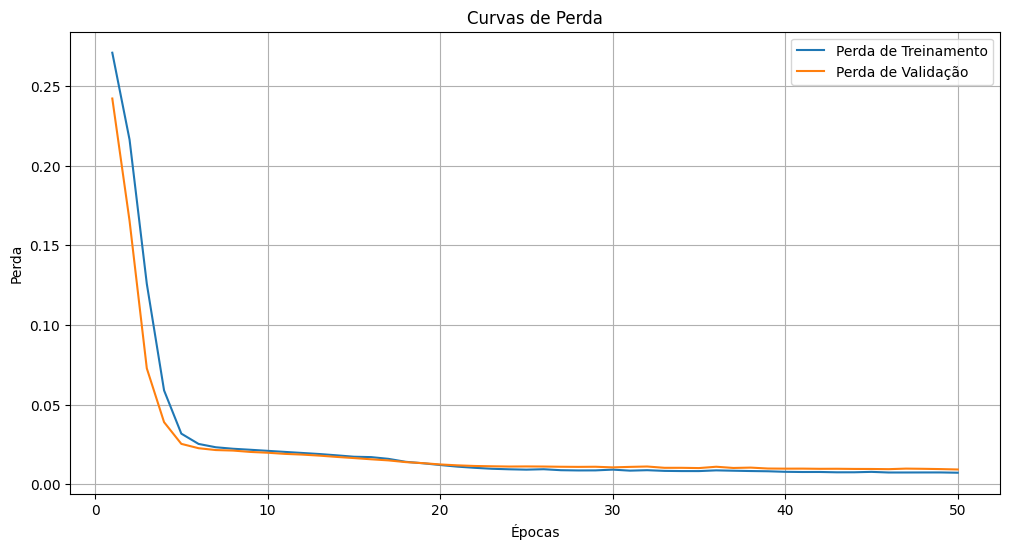

In [ ]:
import matplotlib.pyplot as plt

# Verificando o histórico de treinamento
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plotando as curvas de perda
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, label='Perda de Treinamento')
plt.plot(epochs, val_loss, label='Perda de Validação')
plt.title('Curvas de Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.savefig('4_results/curvas_perda.png')
plt.show()



# Fazer as predições

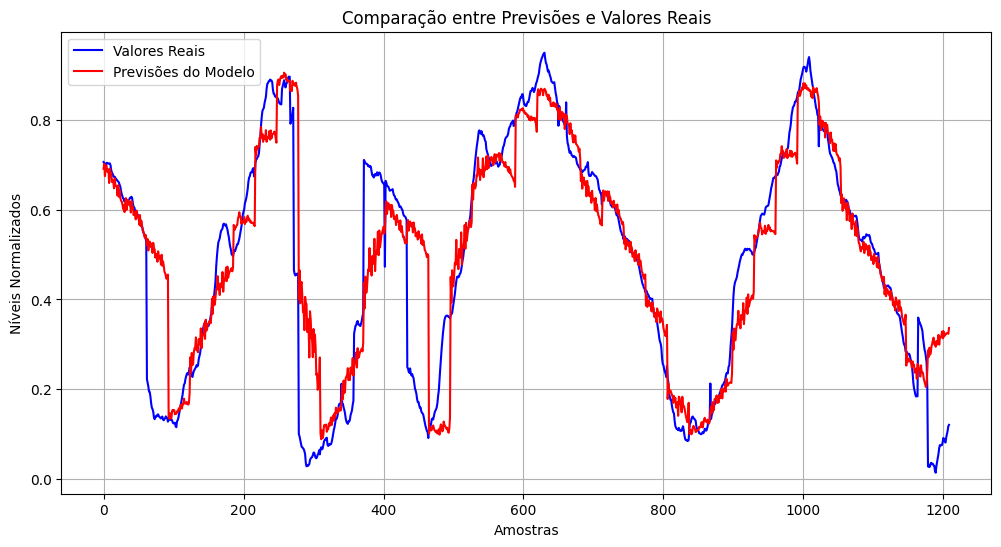

In [ ]:
import matplotlib.pyplot as plt

# Plotar as previsões do modelo vs. os valores reais para uma análise visual
plt.figure(figsize=(12, 6))

# Plotar os valores reais
plt.plot(y_test.flatten(), label='Valores Reais', color='blue')

# Plotar as previsões do modelo
plt.plot(y_pred.flatten(), label='Previsões do Modelo', color='red')

# Configurações do gráfico
plt.title('Comparação entre Previsões e Valores Reais')
plt.xlabel('Amostras')
plt.ylabel('Níveis Normalizados')
plt.legend()
plt.grid(True)
plt.savefig('4_results/comparacao_previsoes_reais.png')
plt.show()



In [ ]:
import pandas as pd

# Criar um DataFrame com as previsões e os valores reais
results_df = pd.DataFrame({
    'Valores Reais': y_test.flatten(),
    'Previsões do Modelo': y_pred.flatten()
})

# Salvar o DataFrame em um arquivo CSV
results_df.to_csv('4_results/previsoes_e_reais.csv', index=False)

print("As previsões e os valores reais foram salvos em 'previsoes_e_reais.csv'.")


As previsões e os valores reais foram salvos em 'previsoes_e_reais.csv'.


# MSE MAE RMSE

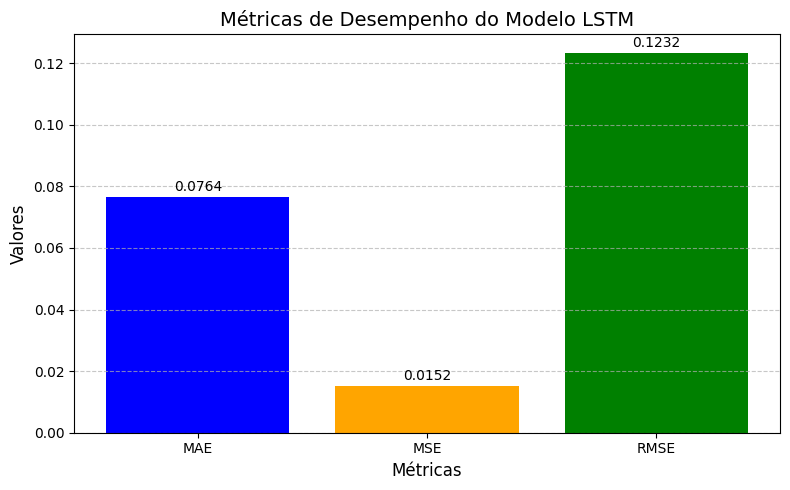


MAE: 0.07640858739614487
MSE: 0.0151872169226408
RMSE: 0.12323642522096634


In [ ]:
# Importando as bibliotecas necessárias
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Calculando as métricas de desempenho
mae = mean_absolute_error(y_test.flatten(), y_pred.flatten())
mse = mean_squared_error(y_test.flatten(), y_pred.flatten())
rmse = np.sqrt(mse)

# Criando o gráfico para exibir as métricas de desempenho
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.title('Métricas de Desempenho do Modelo LSTM', fontsize=14)
plt.ylabel('Valores', fontsize=12)
plt.xlabel('Métricas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo as métricas no gráfico
for i, value in enumerate(values):
    plt.text(i, value + 0.001, f'{value:.4f}', ha='center', va='bottom')

plt.tight_layout()

# Salvar o gráfico como uma imagem
plt.savefig('4_results/metricas_desempenho.png', format='png', dpi=300)

# Mostrar o gráfico na tela
plt.show()

# Imprimir os valores das métricas
print(f'\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}')

# Prevendo próxima cota mensal (previsão autoregressiva)

In [ ]:
import numpy as np


num_steps = 5

# Iniciar com a última sequência de entrada
last_sequence = X_test[-1]  # Pegue a última sequência de teste

# Lista para armazenar as previsões
predictions = []

for _ in range(num_steps):
    # Fazer a previsão para o próximo passo
    next_prediction = model.predict(last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1]))

    # Adicionar a previsão à lista de previsões
    predictions.append(next_prediction.flatten())

    # Atualizar a sequência: remover o primeiro elemento e adicionar a nova previsão
    last_sequence = np.append(last_sequence[1:], next_prediction, axis=0)

# Converter as previsões em um array NumPy
predictions = np.array(predictions)

# Exibir as previsões
print("Previsões para os próximos meses:")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Previsões para os próximos meses:
[[0.28646168 0.27115867 0.2921363  0.2764758  0.2814207  0.29515073
  0.30132633 0.30912825 0.31467122 0.29976368 0.29927838 0.29434186
  0.30720708 0.29938778 0.3067175  0.32084322 0.29885724 0.3144187
  0.31570214 0.31704253 0.3280992  0.31310368 0.3292415  0.31684938
  0.32100385 0.3209768  0.3240385  0.32498354 0.32461727 0.32311714
  0.33611616]
 [0.33450705 0.3217924  0.33959064 0.32998896 0.329642   0.3414443
  0.34807557 0.35353935 0.3635718  0.3502382  0.34964335 0.33996016
  0.35016423 0.3474942  0.34914762 0.36356473 0.34535792 0.35952348
  0.3574903  0.36327434 0.37109336 0.3591722  0.3742813  0.359586
  0.3639057  0.36267594 0.36071932 0.36389524 0.36190656 0.36130154
  0.37569737]
 [0.3713445  0.36142752 0.3735094  0.36818725 0.3681425  0.37583902
  0.

In [ ]:
df_predictions = pd.DataFrame(predictions)
print(df_predictions)

# Salvar o DataFrame em um arquivo CSV
df_predictions.to_csv('4_results/previsoes.csv', index=False)

print("Previsões salvas em previsoes.csv")


         0         1         2         3         4         5         6   \
0  0.286462  0.271159  0.292136  0.276476  0.281421  0.295151  0.301326   
1  0.334507  0.321792  0.339591  0.329989  0.329642  0.341444  0.348076   
2  0.371345  0.361428  0.373509  0.368187  0.368142  0.375839  0.382640   
3  0.391672  0.384990  0.391823  0.389860  0.390095  0.394900  0.401019   
4  0.397429  0.393287  0.396708  0.396676  0.397026  0.400276  0.405580   

         7         8         9   ...        21        22        23        24  \
0  0.309128  0.314671  0.299764  ...  0.313104  0.329242  0.316849  0.321004   
1  0.353539  0.363572  0.350238  ...  0.359172  0.374281  0.359586  0.363906   
2  0.388963  0.396039  0.386381  ...  0.390675  0.399626  0.387562  0.391058   
3  0.407907  0.411613  0.405734  ...  0.406072  0.409937  0.400602  0.402924   
4  0.412672  0.413959  0.410748  ...  0.408674  0.409533  0.401976  0.403384   

         25        26        27        28        29        30  
0  0